<a href="https://colab.research.google.com/github/Haile-12/convex-optimization-for-svm-dual-formulation-Liner-kernel-/blob/main/SVM_Linear_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convex Optimization and SVM Dual Problem - Liner Kernel

## 1. Convex Optimization Problem Setup

### 1.1 General Idea of a Convex Optimization Problem

A convex optimization problem is a mathematical problem where the goal is to minimize a convex objective function subject to a set of constraints that define a feasible region, which is itself convex.

**Specifically, the problem can be formulated as:**

**Objective Function:**  
A convex function `f0(x)` defined on a convex domain `D ⊆ Rⁿ`.  
The function `f0: D → R` represents the quantity to minimize (or maximize if concave).

**Constraints:**  
These include:

- Inequality constraints `fi(x) ≤ 0` for convex functions `fi`  
- Equality constraints `hj(x) = 0` where `hj` are affine functions (linear or affine)  

The set of all `x` satisfying these constraints forms the feasible set `C`, which must be convex.

**Mathematical Form:**

```
minimize f0(x)
subject to fi(x) ≤ 0, i=1,…,m
           Ax = b
```

**Key Points of This Formulation:**

- The objective and all inequality constraint functions are convex.  
- The equality constraints are affine.  
- The feasible set `C` is the intersection of convex sets, therefore convex.  
- Because of convexity, any local minimum is also a global minimum.  
- If the objective is strictly convex, the optimal solution is unique.  

---

### 1.2 Convex Functions and Convex Optimization

#### 1.2.1 What Makes a Function Convex?

A function is convex if it curves upward like a bowl and satisfies:

```
f(tx1 + (1−t)x2) ≤ t f(x1) + (1−t) f(x2),  ∀ x1, x2 in domain, t∈[0,1]
```

**Intuition:**  
The line segment connecting any two points on the graph never dips below the curve.

- **Strictly convex:** the line segment lies strictly above the curve (except at endpoints).  
- **Check convexity:** For single-variable, twice-differentiable functions, if `f''(x) ≥ 0` → convex.  
- **Examples:** `f(x) = x^2`, `f(x) = e^x` are convex; `f(x) = -x^2` is not.  

**Multivariable Case:**  
For a function `f(x)` with `x ∈ Rⁿ`, the Hessian matrix `H(x)` is the matrix of second derivatives:

```
H(x) = [ ∂²f/∂x1² ... ∂²f/∂x1∂xn
         ...
         ∂²f/∂xn∂x1 ... ∂²f/∂xn² ]
```

If `H(x)` is positive semidefinite for all `x`, then `f(x)` is convex.

---

### 1.3 Why Convex Problems Guarantee Global Optima

**Key idea:** In convex problems, any local minimum is also a global minimum.

#### 1.3.1 Convex Feasible Set + Convex Objective

- The feasible set is convex.  
- For any two feasible points, the line segment connecting them is entirely feasible.  
- The convex objective function ensures no valleys or multiple local minima inside the feasible region.

#### 1.3.2 Property of Convex Functions

For any two points `(x1, x2)` in the feasible set:

```
f0(tx1 + (1−t)x2) ≤ t f0(x1) + (1−t) f0(x2), t∈[0,1]
```

This ensures the function is “bowl-shaped” and cannot have hidden local minima.

#### 1.3.3 Geometric Reasoning for Global Optimality

Let `x*` be a local minimum:

```
f0(x*) ≤ f0(x) for all nearby points x
```

Take any feasible point `y`. Because the feasible set is convex, the line segment connecting `x*` and `y` lies entirely inside the feasible set.

Convexity ensures:

```
f0(t x* + (1−t)y) ≤ t f0(x*) + (1−t) f0(y), t ∈ [0,1]
```

For small `t > 0`, the point `(t x* + (1−t)y)` is near `x*`. By local minimality:

```
f0(x*) ≤ f0(t x* + (1−t)y)
```

Combining inequalities gives:

```
f0(x*) ≤ f0(y)
```

**Conclusion:** `x*` is global, not just local.

#### 1.3.4 Strict Convexity (Optional)

If `f0` is strictly convex:

```
f0(tx1 + (1−t)x2) < t f0(x1) + (1−t) f0(x2), t∈(0,1)
```

- Guarantees the global minimum is unique.  
- Makes optimization predictable and reliable.

---

### 1.4 Takeaways

- Any local minimum of a convex function over a convex set is also a global minimum.  
- Convex functions + convex feasible sets eliminate local traps.  
- Strict convexity ensures uniqueness of the solution.  
- Convex problems are efficient to solve and reliable for optimization.

---

## 2. Duality Concept

**Key Idea:**  
Duality transforms a constrained optimization problem (primal) into a related problem (dual) whose solution can:

- Provide bounds on the original problem's optimal value  
- Simplify computation by turning difficult constraints into easier structures  
- Offer insight into how constraints affect the solution  

Leveraging duality provides both theoretical insight and practical computational advantages.

---

### 2.1 How Duality Simplifies Solving Constrained Optimization Problems

**Transformation of Constraints into Dual Variables:**  
Primal constraints are incorporated into the objective function through Lagrange multipliers.  
This turns a problem with complex constraints into one where dual variables act as penalties, making optimization easier.

**Alternative Problem Formulation:**  
The dual problem often has:

- Fewer variables  
- A more regular feasible region  
- A smoother or separable objective function  

**Strong Duality in Convex Problems:**  
For convex problems that satisfy Slater’s condition, the optimal value of the dual equals the optimal value of the primal.  
Solving the dual suffices to obtain the global optimum.

**Structural and Sensitivity Insights:**  
Dual variables indicate which constraints are active at the optimum.  
Analysts can identify constraints that drive the solution and simplify or reformulate the problem.

---

### 2.2 How Duality Improves Computational Efficiency

**Reduction in Problem Complexity:**  
The dual may have fewer variables or simpler constraints, lowering computational cost.

**Decomposition and Parallelization:**  
Duality allows splitting a large problem into smaller subproblems, solved independently or in parallel.

**Algorithmic Acceleration:**  
Algorithms exploit primal and dual information:

- Primal-dual interior-point methods  
- ADMM (Alternating Direction Method of Multipliers)  
- Dual ascent or gradient-based dual methods  

**Stopping Criteria via Duality Gap:**  
The difference between primal and dual objective values provides a measure of solution accuracy.

**Constraint Sensitivity and Prioritization:**  
Lagrange multipliers quantify the impact of each constraint on the optimal value.

**Summary:**  
Duality simplifies constrained optimization and improves computational efficiency.  
For convex problems, strong duality guarantees the dual solution is globally optimal.

---

## 3. Implementation Section

### 3.1 SVM as a Convex Optimization Problem

Support Vector Machine (SVM) is a supervised machine learning algorithm for classification and regression.  
Its goal is to **maximize the margin** between two classes.

SVMs are a prime example of convex optimization in AI. They find a hyperplane that maximizes the margin while maintaining correct classification.

---

#### Primal Formulation (Hard-Margin SVM)

Given a dataset `(xi, yi)` with `yi ∈ {-1,+1}`, the hard-margin SVM primal problem is:

```
minimize (1/2) ||w||^2
subject to yi (w^T xi + b) ≥ 1, i=1,…,N
```

- **Objective:** Minimize the norm of `w` (maximize margin)  
- **Constraints:** Ensure correct classification  

**Why this is convex:**  

- Objective `(1/2)||w||^2` is quadratic → convex  
- Constraints `yi (w^T xi + b) − 1 ≥ 0` are affine → convex sets  

Convexity ensures **any local minimum is global**.

---

#### Dual Formulation

Using Lagrange multipliers `αi ≥ 0`:

```
maximize ∑i=1^N αi − (1/2) ∑i,j=1^N αi αj yi yj xi^T xj
subject to ∑i=1^N αi yi = 0, αi ≥ 0
```

- **Objective:** Maximize concave quadratic function in `α`  
- **Constraints:** Linear equality and inequality  

**Why the Dual is Convex – Strong Reasons:**

1. **Quadratic term is concave:**  
   `Qij = yi yj xi^T xj` is positive semidefinite → `-(1/2) α^T Q α` is concave.

2. **Linear constraints preserve convexity:**  
   Equality `∑i αi yi = 0` and inequalities `αi ≥ 0` are linear → convex sets.

3. **Concave maximization = Convex problem:**  
   Maximizing a concave function over a convex set is a convex optimization problem.

4. **Guarantees global optimality:**  
   Convexity implies no local maxima other than the global maximum.

5. **Supports kernel trick efficiently:**  
   Dual depends only on inner products `xi^T xj`, enabling high-dimensional mapping implicitly via kernels.

6. **Identifies support vectors naturally:**  
   Only points with `αi > 0` contribute to the hyperplane.

7. **Numerical stability and solver efficiency:**  
   Convexity allows robust QP solvers like `cvxopt` or `cvxpy`.

**Key Insights:**  
SVMs are convex optimization problems, ensuring a single globally optimal solution can be found efficiently.

---

### 3.2 Code Implementations of the Dual Problem using  **cvxopt** Librariy




     pcost       dcost       gap    pres   dres
 0: -1.4074e+01 -2.9516e+01  3e+02  2e+01  2e+00
 1: -2.6972e+01 -2.4261e+01  1e+02  6e+00  7e-01
 2: -3.8918e+01 -2.5960e+01  8e+01  3e+00  4e-01
 3: -2.1446e+01 -1.5227e+01  3e+01  1e+00  1e-01
 4: -1.0651e+01 -1.1651e+01  1e+00  3e-15  2e-15
 5: -1.1265e+01 -1.1277e+01  1e-02  2e-15  3e-15
 6: -1.1273e+01 -1.1273e+01  1e-04  4e-15  3e-15
 7: -1.1273e+01 -1.1273e+01  1e-06  2e-15  2e-15
Optimal solution found.

--- Custom SVM  Report---
Training Accuracy: 100.00%
Test Accuracy: 100.00%
Number of support vectors: 4


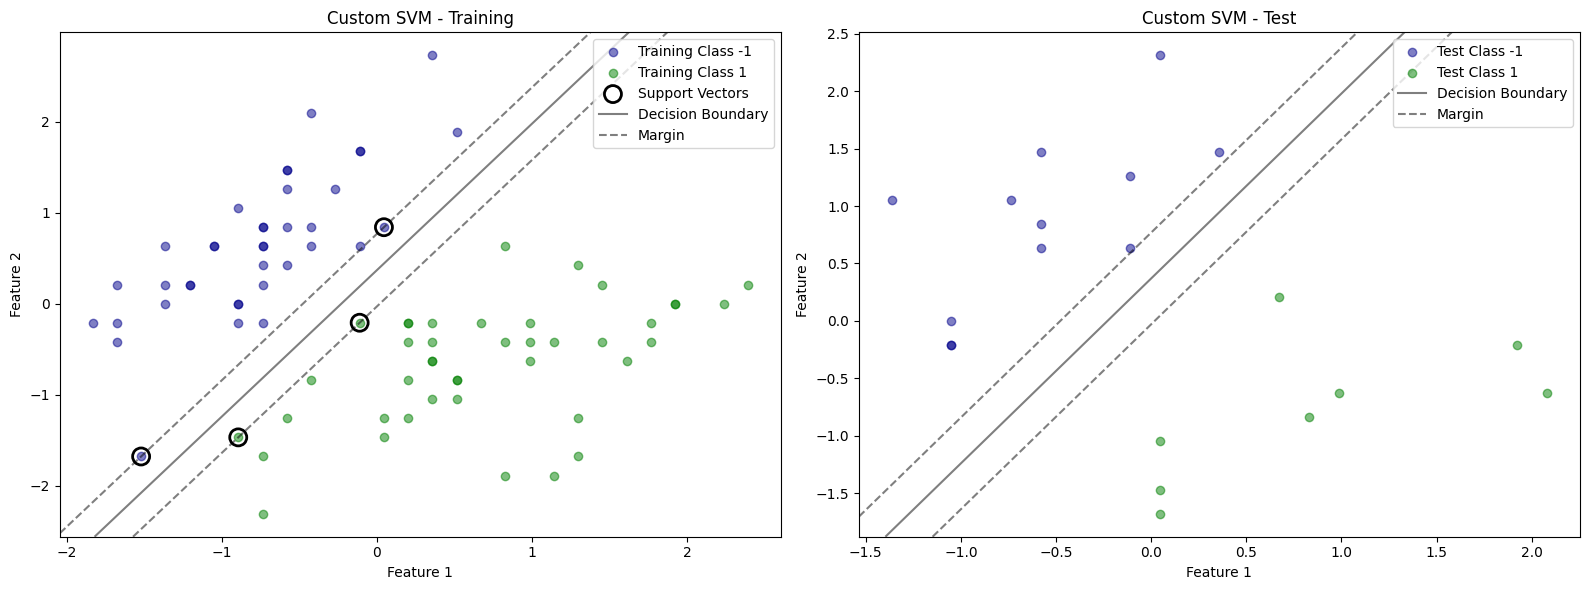


--- scikit-learn Linear SVM Report ---
Training Accuracy: 100.00%
Test Accuracy: 100.00%
Number of support vectors: 4


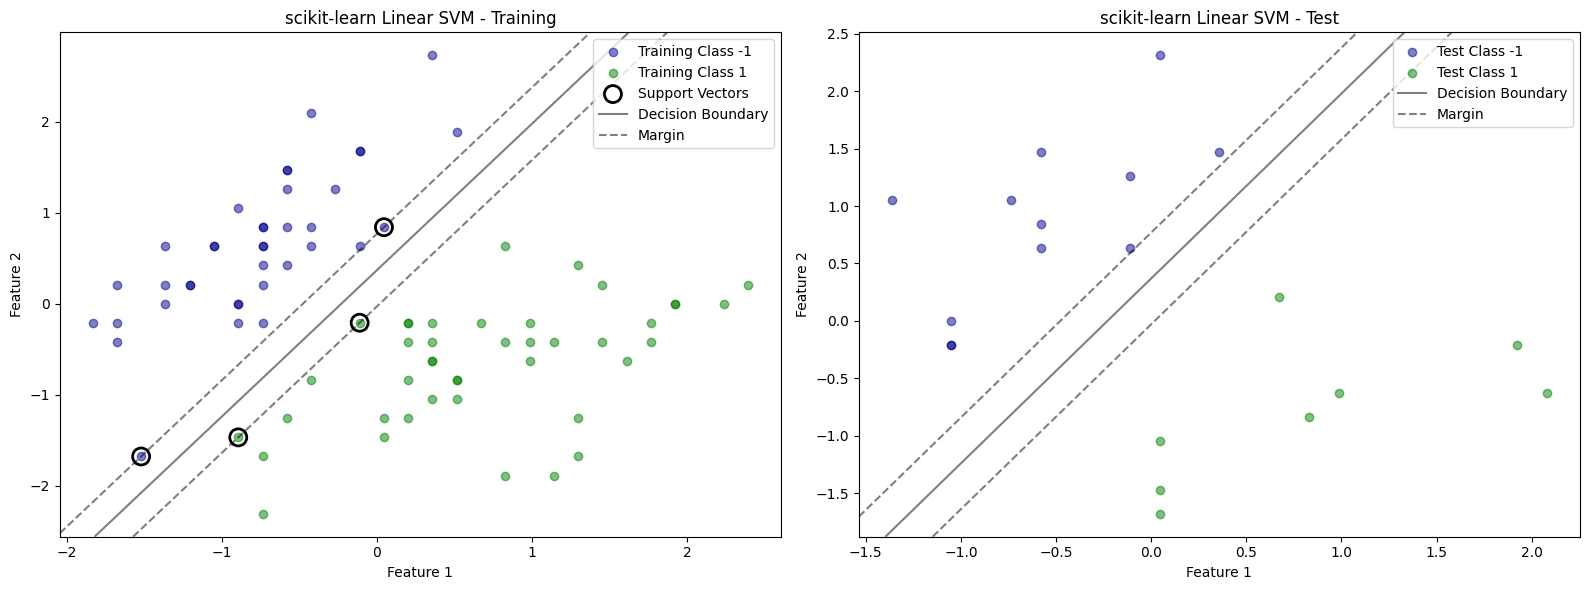

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# cvxopt progress output
solvers.options['show_progress'] = True

# =================================================
# 1. LOAD AND PREPARE DATA
# =================================================
def load_binary_iris():
    """
    Load Iris dataset from scikit-learn and keep only two classes with 2 features  for binary classification.
    Convert labels to {-1 For Setosa, 1 for Versicolor}.
    """
    data = load_iris()
    X = data.data[:, :2]  # Select only the first two features sepal length and sepal width
    y = data.target

    # Use only classes 0 and 1
    mask = y < 2
    X = X[mask]
    y = y[mask]
    y = np.where(y == 0, -1, 1)

    # Feature scaling
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y

# =================================================
# 2. HARD-MARGIN SVM - DUAL FORMULATION
# =================================================
def setup_hard_margin_svm_dual(X, y):
    """
    Set up matrices for hard-margin SVM dual problem.
    """
    n_samples = X.shape[0]
    K = np.dot(X, X.T)
    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(n_samples))

    # Equality constraint: sum(alpha_i * y_i) = 0
    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)

    # Inequality: alpha_i >= 0
    G = matrix(-np.eye(n_samples))
    h = matrix(np.zeros(n_samples))

    return P, q, G, h, A, b

def solve_svm_dual(P, q, G, h, A, b):
    """
    Solve the dual SVM QP problem using cvxopt.
    """
    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solution['x']).flatten()
    return alphas

def extract_svm_solution(X, y, alphas, sv_threshold=1e-5):
    """
    Extract support vectors, weights, and bias from dual solution.
    """
    sv_indices = np.where(alphas > sv_threshold)[0]
    sv_alphas = alphas[sv_indices]
    sv_X = X[sv_indices]
    sv_y = y[sv_indices]

    w = np.sum(sv_alphas[:, None] * sv_y[:, None] * sv_X, axis=0)
    b = np.mean(sv_y - np.dot(sv_X, w))
    return w, b, sv_X

# =================================================
# 3. EVALUATION
# =================================================
def evaluate_svm(X, y, w, b):
    """
    Compute accuracy of linear SVM.
    """
    predictions = np.sign(np.dot(X, w) + b)
    accuracy = np.mean(predictions == y) * 100
    return accuracy

# =================================================
# 4. PLOTTING
# =================================================
def plot_svm(X_train, y_train, X_test, y_test, w, b, support_vectors, title="Hard Margin SVM"):
    """
    Plot training and test data side by side with decision boundary and margins.
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    for ax_idx, (ax, X, y, dataset_type) in enumerate(zip(axes, [X_train, X_test], [y_train, y_test], ["Training", "Test"])):
        # Plot data points, separating by class for distinct legend entries
        ax.scatter(X[y == -1, 0], X[y == -1, 1], c='darkblue', alpha=0.5, label=f'{dataset_type} Class -1')
        ax.scatter(X[y == 1, 0], X[y == 1, 1], c='green', alpha=0.5, label=f'{dataset_type} Class 1')

        # Plot support vectors only on training plot
        if dataset_type == "Training":
            ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none',
                       edgecolors='k', label='Support Vectors', linewidth=2)

        # Decision boundary and margins
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx = np.linspace(xlim[0], xlim[1], 50)
        yy = np.linspace(ylim[0], ylim[1], 50)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = np.dot(xy, w) + b
        ax.contour(XX, YY, Z.reshape(XX.shape), colors='k', levels=[-1, 0, 1],
                   linestyles=['--', '-', '--'], alpha=0.5)

        # Add explicit dummy lines for decision boundary and margin legend entries
        ax.plot([], [], 'k-', label='Decision Boundary', alpha=0.5)
        ax.plot([], [], 'k--', label='Margin', alpha=0.5)

        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_title(f"{title} - {dataset_type}")
        ax.legend()

    plt.tight_layout()
    plt.show()

# =================================================
# 5. MAIN EXECUTION
# =================================================
def data():
    X, y = load_binary_iris()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def Run_custom_SVM():
    X_train, X_test, y_train, y_test = data()

    # Custom SVM
    P, q, G, h, A, b = setup_hard_margin_svm_dual(X_train, y_train)
    alphas = solve_svm_dual(P, q, G, h, A, b)
    w, b, support_vectors = extract_svm_solution(X_train, y_train, alphas)

    train_acc = evaluate_svm(X_train, y_train, w, b)
    test_acc = evaluate_svm(X_test, y_test, w, b)

    print("\n--- Custom SVM  Report---")
    print(f"Training Accuracy: {train_acc:.2f}%")
    print(f"Test Accuracy: {test_acc:.2f}%")
    print(f"Number of support vectors: {len(support_vectors)}")

    # Plot side by side
    plot_svm(X_train, y_train, X_test, y_test, w, b, support_vectors, title="Custom SVM")

def Run_sklearn_SVM():
    X_train, X_test, y_train, y_test = data()

    # scikit-learn SVM
    model= SVC(kernel='linear', C=1e10)
    model.fit(X_train, y_train)
    sk_train_acc = model.score(X_train, y_train) * 100
    sk_test_acc = model.score(X_test, y_test) * 100
    print("\n--- scikit-learn Linear SVM Report ---")
    print(f"Training Accuracy: {sk_train_acc:.2f}%")
    print(f"Test Accuracy: {sk_test_acc:.2f}%")
    print(f"Number of support vectors: {len(model.support_)}")

    # Plot scikit-learn SVM side by side
    plot_svm(X_train, y_train, X_test, y_test, model.coef_.flatten(), model.intercept_[0],
                          X_train[model.support_], title="scikit-learn Linear SVM")
Run_custom_SVM()
Run_sklearn_SVM()